# AMAZON PRODUCT REVIEW ANALYSIS CAPSTONE PROJECT

## import library

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import svm
from gensim.models import Word2Vec
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import itertools
import datetime as dt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
beauty=pd.read_csv('beauty_cleandata11.csv')#read data

In [3]:
beauty.head() #top five

,Unnamed: 0,asin,title,overall,brand,rank,verified,reviewerID,reviewerName,reviewTime,price,style,also_buy,also_view,main_cat,Review,polarity,Sentiment
0,0,9790787006,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,ASZO5WJA6FVVH,Petra Zender,2015-03-09,13.85,34 oz,"['B004D8JQ4G', 'B0020MMD0G', 'B00ENL4HJW', 'B0...","['B00357FTX8', 'B01NBID7FJ', 'B0017JT658']",All Beauty,day favorite glad itfive star,0.500000,Positive
1,1,9790787006,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,A1KU7EEUGYOJYD,V,2015-03-02,13.85,34 oz,"['B004D8JQ4G', 'B0020MMD0G', 'B00ENL4HJW', 'B0...","['B00357FTX8', 'B01NBID7FJ', 'B0017JT658']",All Beauty,love way perfume smell soft sexy scentfive star,0.366667,Positive
2,2,9790787006,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,A1907XNEJPEZEI,Linda Giambrone,2015-02-19,13.85,34 oz,"['B004D8JQ4G', 'B0020MMD0G', 'B00ENL4HJW', 'B0...","['B00357FTX8', 'B01NBID7FJ', 'B0017JT658']",All Beauty,love perfume compliment itfive star,0.500000,Positive
3,3,9790787006,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,A3U7B0EKSK16MQ,Kane,2015-01-14,13.85,34 oz,"['B004D8JQ4G', 'B0020MMD0G', 'B00ENL4HJW', 'B0...","['B00357FTX8', 'B01NBID7FJ', 'B0017JT658']",All Beauty,scent slightly sweet spicy warm definitely uni...,0.244444,Positive
4,4,9790787006,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,False,A3OCOP75PMY097,Jim Francis,2013-01-13,13.85,34 oz,"['B004D8JQ4G', 'B0020MMD0G', 'B00ENL4HJW', 'B0...","['B00357FTX8', 'B01NBID7FJ', 'B0017JT658']",All Beauty,package complete satisfaction wife smell great...,0.227778,Positive


In [4]:
beauty.drop('Unnamed: 0',axis=1,inplace=True)# drop unnamed column

In [5]:
beauty.head(1)

,asin,title,overall,brand,rank,verified,reviewerID,reviewerName,reviewTime,price,style,also_buy,also_view,main_cat,Review,polarity,Sentiment
0,9790787006,Jenna Jameson Heartbreaker Perfume for women 3...,5,Jenna Jameson,298893,True,ASZO5WJA6FVVH,Petra Zender,2015-03-09,13.85,34 oz,"['B004D8JQ4G', 'B0020MMD0G', 'B00ENL4HJW', 'B0...","['B00357FTX8', 'B01NBID7FJ', 'B0017JT658']",All Beauty,day favorite glad itfive star,0.5,Positive


In [6]:
beauty2 = beauty[["Sentiment","Review"]]
beauty2.groupby('Sentiment').describe()

Review                                  
           count unique                   top freq
Sentiment                                         
Negative    7584   7436  poor qualityone star    4
Neutral    10025   6869         goodfive star  402
Positive   51333  47813      love itfive star  437

In [7]:
beauty.shape

(68943, 17)

In [8]:
beauty.isnull().sum() #check null value

asin            0
title           0
overall         0
brand           0
rank            0
verified        0
reviewerID      0
reviewerName    3
reviewTime      0
price           0
style           0
also_buy        0
also_view       0
main_cat        0
Review          1
polarity        0
Sentiment       0
dtype: int64

In [9]:
beauty.dropna(inplace=True)#drop null value

In [10]:
beauty.dtypes#check datatypes

asin             object
title            object
overall           int64
brand            object
rank              int64
verified           bool
reviewerID       object
reviewerName     object
reviewTime       object
price           float64
style            object
also_buy         object
also_view        object
main_cat         object
Review           object
polarity        float64
Sentiment        object
dtype: object

# Classification

## Sentiment classification is the automated process of identifying and classifying emotions in text as positive sentiment, negative sentiment, or neutral sentiment based on the opinions expressed within.

## - CountVectorizer-->CountVectorizer simply counts the number of times a word appears in a document (using a bag-of-words approach)

## - TF-IDF Vectorizer --> TF-IDF Vectorizer takes into account not only how many times a word appears in a document but also how important that word is to the whole corpus

In [85]:
df=beauty[['Sentiment','Review']]
df.head(1)

,Sentiment,Review
0,Positive,day favorite glad itfive star


##### Train/Test Split

In [155]:
x_train, x_test, y_train, y_test = train_test_split(beauty['Review'], beauty['Sentiment'], random_state=42)
print("x_train shape: {}".format(x_train.shape), end='\n')
print("y_train shape: {}".format(y_train.shape), end='\n\n')
print("x_test shape: {}".format(x_test.shape), end='\n')
print("y_test shape: {}".format(y_test.shape), end='\n\n')

x_train shape: (51704,)
y_train shape: (51704,)

x_test shape: (17235,)
y_test shape: (17235,)



In [54]:
print(y_train)

8718     Positive
9679     Positive
43112    Positive
58867    Positive
67187    Positive
           ...   
37196     Neutral
6265     Positive
54890    Positive
860      Positive
15795    Positive
Name: Sentiment, Length: 51704, dtype: object


### CountVectorizer with Multinomial Naive Bayes

In [163]:
df['Sentiment']=df['Sentiment'].astype(str)
df['Review']=df['Review'].astype(str)

In [169]:
x_train, x_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], random_state=42)
print("x_train shape: {}".format(x_train.shape), end='\n')
print("y_train shape: {}".format(y_train.shape), end='\n\n')
print("x_test shape: {}".format(x_test.shape), end='\n')
print("y_test shape: {}".format(y_test.shape), end='\n\n')

x_train shape: (51704,)
y_train shape: (51704,)

x_test shape: (17235,)
y_test shape: (17235,)



In [115]:
# Vectorize X_train
vectorizer = CountVectorizer(min_df=5).fit(x_train)
X_train = vectorizer.transform(x_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<51704x7713 sparse matrix of type '<class 'numpy.int64'>'
	with 747494 stored elements in Compressed Sparse Row format>


In [116]:
X_test = vectorizer.transform(x_test)

In [117]:
# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [118]:
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    #print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [119]:
# Evaluate the model on validaton set
predictions = mnb.predict(X_test)
modelEvaluation(predictions)


Accuracy on validation set: 0.8511

Classification report : 
               precision    recall  f1-score   support

    Negative       0.55      0.53      0.54      1962
     Neutral       0.87      0.71      0.78      2460
    Positive       0.89      0.93      0.91     12813

    accuracy                           0.85     17235
   macro avg       0.77      0.72      0.74     17235
weighted avg       0.85      0.85      0.85     17235


Confusion Matrix : 
 [[ 1040    68   854]
 [  101  1753   606]
 [  733   205 11875]]


In [120]:
def get_score(model):
    '''
    Prints the recall score from model
    model : classifier to predict values of X
    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Accuracy Score on training set : ", metrics.accuracy_score(y_train, pred_train))
    print("Accuracy Score on test set : ", metrics.accuracy_score(y_test, pred_test))
    print("-------------------------------------------------------------")
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train,average='weighted'))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test,average='weighted'))
    print("-------------------------------------------------------------")
    print("F1 Score on training set : ", metrics.f1_score(y_train, pred_train,average='weighted'))
    print("F1 Score on test set : ", metrics.f1_score(y_test, pred_test,average='weighted'))
    print("-------------------------------------------------------------")
    print("Precision Score on training set : ", metrics.precision_score(y_train, pred_train,average='weighted'))
    print("Precision Score on test set : ", metrics.precision_score(y_test, pred_test,average='weighted'))

In [121]:
get_score(mnb)

Accuracy Score on training set :  0.870474237969983
Accuracy Score on test set :  0.8510588917899623
-------------------------------------------------------------
Recall on training set :  0.870474237969983
Recall on test set :  0.8510588917899623
-------------------------------------------------------------
F1 Score on training set :  0.8695161312694033
F1 Score on test set :  0.8485285120165854
-------------------------------------------------------------
Precision Score on training set :  0.8699280952236124
Precision Score on test set :  0.8487094759898324


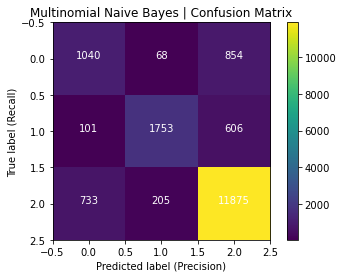

In [125]:
mnb_cfm = confusion_matrix(y_test, predictions)
plt.imshow(mnb_cfm, interpolation='nearest')

for i, j in itertools.product(range(mnb_cfm.shape[0]), range(mnb_cfm.shape[1])):
    plt.text(j, i, mnb_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Multinomial Naive Bayes | Confusion Matrix')
plt.colorbar();

## TfidfVectorizer with Multinomial Naive Bayes

In [129]:
# Vectorize X_train
vectorizer = TfidfVectorizer(min_df=5).fit(x_train)
X_train = vectorizer.transform(x_train)
print("X_train:\n{}".format(repr(X_train)))
X_test = vectorizer.transform(x_test)


X_train:
<51704x7713 sparse matrix of type '<class 'numpy.float64'>'
	with 747494 stored elements in Compressed Sparse Row format>


In [130]:
# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [131]:
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    #print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [134]:
# Evaluate the model on validaton set
predictions = mnb.predict(X_test)
modelEvaluation(predictions)


Accuracy on validation set: 0.8087

Classification report : 
               precision    recall  f1-score   support

    Negative       0.92      0.06      0.11      1962
     Neutral       0.96      0.43      0.59      2460
    Positive       0.80      1.00      0.89     12813

    accuracy                           0.81     17235
   macro avg       0.89      0.49      0.53     17235
weighted avg       0.83      0.81      0.76     17235


Confusion Matrix : 
 [[  120    10  1832]
 [    3  1046  1411]
 [    8    33 12772]]


In [132]:
def get_score(model):
    '''
    Prints the recall score from model
    model : classifier to predict values of X
    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Accuracy Score on training set : ", metrics.accuracy_score(y_train, pred_train))
    print("Accuracy Score on test set : ", metrics.accuracy_score(y_test, pred_test))
    print("-------------------------------------------------------------")
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train,average='weighted'))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test,average='weighted'))
    print("-------------------------------------------------------------")
    print("F1 Score on training set : ", metrics.f1_score(y_train, pred_train,average='weighted'))
    print("F1 Score on test set : ", metrics.f1_score(y_test, pred_test,average='weighted'))
    print("-------------------------------------------------------------")
    print("Precision Score on training set : ", metrics.precision_score(y_train, pred_train,average='weighted'))
    print("Precision Score on test set : ", metrics.precision_score(y_test, pred_test,average='weighted'))

In [133]:
get_score(mnb)

Accuracy Score on training set :  0.8199752436948785
Accuracy Score on test set :  0.8087032201914709
-------------------------------------------------------------
Recall on training set :  0.8199752436948785
Recall on test set :  0.8087032201914709
-------------------------------------------------------------
F1 Score on training set :  0.774880959005291
F1 Score on test set :  0.7559289663323333
-------------------------------------------------------------
Precision Score on training set :  0.8441596559911111
Precision Score on test set :  0.8342625137518194


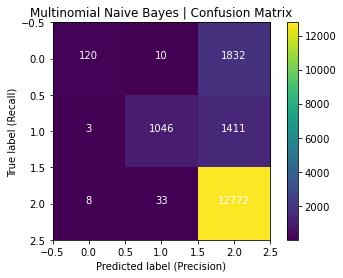

In [135]:
mnb_cfm = confusion_matrix(y_test, predictions)
plt.imshow(mnb_cfm, interpolation='nearest')

for i, j in itertools.product(range(mnb_cfm.shape[0]), range(mnb_cfm.shape[1])):
    plt.text(j, i, mnb_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Multinomial Naive Bayes | Confusion Matrix')
plt.colorbar();

## CountVectorizer with Logistic Regression

In [143]:
# Fitting and transforming the training data to a document-term matrix using TfidfVectorizer 
# Vectorize X_train
vectorizer = CountVectorizer(min_df=5).fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [144]:
# Evaluate the model on validaton set
predictions = lr.predict(X_test)
modelEvaluation(predictions)


Accuracy on validation set: 0.9402

Classification report : 
               precision    recall  f1-score   support

    Negative       0.80      0.71      0.75      1962
     Neutral       0.92      0.97      0.95      2460
    Positive       0.96      0.97      0.97     12813

    accuracy                           0.94     17235
   macro avg       0.89      0.88      0.89     17235
weighted avg       0.94      0.94      0.94     17235


Confusion Matrix : 
 [[ 1390   133   439]
 [   30  2397    33]
 [  314    82 12417]]


In [145]:
get_score(lr)

Accuracy Score on training set :  0.9766749187683739
Accuracy Score on test set :  0.9401798665506237
-------------------------------------------------------------
Recall on training set :  0.9766749187683739
Recall on test set :  0.9401798665506237
-------------------------------------------------------------
F1 Score on training set :  0.9763625695142175
F1 Score on test set :  0.9388567271623806
-------------------------------------------------------------
Precision Score on training set :  0.9763438761591248
Precision Score on test set :  0.9384428662583616


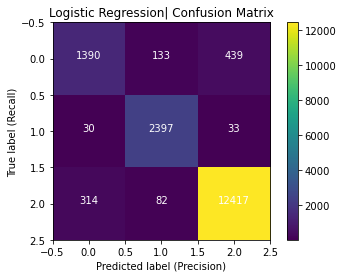

In [146]:
lr_cfm = confusion_matrix(y_test, predictions)
plt.imshow(lr_cfm, interpolation='nearest')

for i, j in itertools.product(range(lr_cfm.shape[0]), range(lr_cfm.shape[1])):
    plt.text(j, i, lr_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Logistic Regression| Confusion Matrix')
plt.colorbar();

## TfidfVectorizer with Logistic Regression

In [190]:
# Vectorize X_train
vectorizer = TfidfVectorizer(min_df=5).fit(x_train)
X_train = vectorizer.transform(x_train)
print("X_train:\n{}".format(repr(X_train)))
X_test = vectorizer.transform(x_test)


X_train:
<51704x7713 sparse matrix of type '<class 'numpy.float64'>'
	with 747494 stored elements in Compressed Sparse Row format>


In [191]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [192]:
# Evaluate the model on validaton set
predictions = lr.predict(X_test)
modelEvaluation(predictions)


Accuracy on validation set: 0.9316

Classification report : 
               precision    recall  f1-score   support

    Negative       0.87      0.61      0.72      1962
     Neutral       0.93      0.92      0.93      2460
    Positive       0.94      0.98      0.96     12813

    accuracy                           0.93     17235
   macro avg       0.91      0.84      0.87     17235
weighted avg       0.93      0.93      0.93     17235


Confusion Matrix : 
 [[ 1196   101   665]
 [   27  2270   163]
 [  158    65 12590]]


In [193]:
get_score(lr)

Accuracy Score on training set :  0.9542975398421786
Accuracy Score on test set :  0.9315926892950391
-------------------------------------------------------------
Recall on training set :  0.9542975398421786
Recall on test set :  0.9315926892950391
-------------------------------------------------------------
F1 Score on training set :  0.9523013308331121
F1 Score on test set :  0.9274504063567551
-------------------------------------------------------------
Precision Score on training set :  0.9532709073425139
Precision Score on test set :  0.9291480523958284


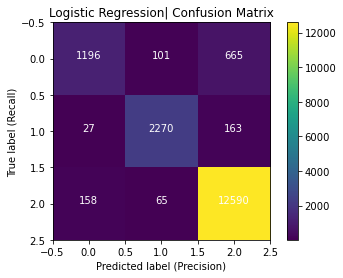

In [194]:
lr_cfm = confusion_matrix(y_test, predictions)
plt.imshow(lr_cfm, interpolation='nearest')

for i, j in itertools.product(range(lr_cfm.shape[0]), range(lr_cfm.shape[1])):
    plt.text(j, i, lr_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Logistic Regression| Confusion Matrix')
plt.colorbar();

## Create data frame for compare model

- CVMNB-->CountVectorizer with Multinomial Naive Bayes
- TFIDMNB-->TfidfVectorizer with Multinomial Naive Bayes
- CVLR-->CountVectorizer with Logistic Regression
- TFIDLR-->TfidfVectorizer with Logistic Regression

In [236]:
Accuracy=[85.10,80.87,94.01,93.15]
F1Score=[84.85,75.59,93.88,92.74]
Model=['CVMNB','TFIDMNB','CVLR','TFIDLR']
dictt={'Model':Model,"Accuracy":Accuracy,"F1-Score":F1Score}
df1=pd.DataFrame(dictt)

In [237]:
df1

,Model,Accuracy,F1-Score
0,CVMNB,85.10,84.85
1,TFIDMNB,80.87,75.59
2,CVLR,94.01,93.88
3,TFIDLR,93.15,92.74


## CVLR and TFIDLR both have good accuracy and f1score, not much difference between the two.So we can use any model for Sentiment prediction

### Predictions for unseen review using Classification model

## positive

In [209]:
lr.predict(vectorizer.transform(['Thank you so much for the kind words. We’re very happy to hear that we share the same passion for food and that you had a great experience with us! Our kitchen staff will be especially happy to read this review. Might we recommend you also try our special meal on your next visit? We’re sure you’re going to love it as well. See you soon!']))

array(['Positive'], dtype=object)

## Negative

In [223]:
lr.predict(vectorizer.transform([' we’re sorry to hear that we missed the mark here. Would you please consider reaching out to us at [your phone number] or email with any further comments or suggestions? We hope we can use this to improve in the future.']))

array(['Negative'], dtype=object)

## Neutral

In [229]:
lr.predict(vectorizer.transform([' i purchased a products but it not worked ']))

array(['Neutral'], dtype=object)

In [238]:
beauty.columns

Index(['asin', 'title', 'overall', 'brand', 'rank', 'verified', 'reviewerID',
       'reviewerName', 'reviewTime', 'price', 'style', 'also_buy', 'also_view',
       'main_cat', 'Review', 'polarity', 'Sentiment'],
      dtype='object')

# Clustring

## Clustering is the task of dividing the unlabeled data or data points into different clusters such that similar data points fall in the same cluster than those which differ from the others. In simple words, the aim of the clustering process is to segregate groups with similar traits and assign them into clusters.

# K-means 

## K-means clustering is a type of unsupervised machine learning algorithm used to group data points or observations into K different clusters based on their similarities. The K in K-means represents the number of clusters that the algorithm will identify. The algorithm works by randomly assigning data points to one of K clusters, computing the centroid of each cluster, and then reassigning data points to the nearest centroid. This process is repeated iteratively until the clusters no longer change significantly or until a maximum number of iterations is reached. K-means is commonly used in a variety of fields, including image processing, natural language processing, and customer segmentation.

## Customer retention

You can use k-means clustering to analyse and group customer churn to identify and profile your consumers based on retention. You can use variables such as frequency of purchases, how recently the consumer visited the store, average spend per trip and basket composition to analyse and predict retention rates of particular customer segments

In [40]:
df2=beauty[['price','overall','Review','brand','reviewerID','asin','Sentiment']]

In [41]:
df2

,price,overall,Review,brand,reviewerID,asin,Sentiment
0,13.85,5,day favorite glad itfive star,Jenna Jameson,ASZO5WJA6FVVH,9790787006,Positive
1,13.85,5,love way perfume smell soft sexy scentfive star,Jenna Jameson,A1KU7EEUGYOJYD,9790787006,Positive
2,13.85,5,love perfume compliment itfive star,Jenna Jameson,A1907XNEJPEZEI,9790787006,Positive
3,13.85,5,scent slightly sweet spicy warm definitely uni...,Jenna Jameson,A3U7B0EKSK16MQ,9790787006,Positive
4,13.85,5,package complete satisfaction wife smell great...,Jenna Jameson,A3OCOP75PMY097,9790787006,Positive
...,...,...,...,...,...,...,...
68938,3.76,3,took forever arrive could not beat pricea adve...,AutumnFall,A1I7PLXBE8I160,B01HEYYRIK,Neutral
68939,3.76,5,work far problem orderfive star,AutumnFall,A212WAJ84YS6RV,B01HEYYRIK,Positive
68940,3.76,2,you re look rubber inside hard plastic outside...,AutumnFall,A1A8K80NOU6U4C,B01HEYYRIK,Negative
68941,3.76,5,nice not bulkyfive star,AutumnFall,APZLYTVXCR6US,B01HEYYRIK,Positive


In [22]:

#Apply TfidfVectorizer to review text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics

In [20]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=5)
tf_idf_vect.fit(df2['Review'])
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*100)

tf_idf = tf_idf_vect.transform(df2['Review'])
#Normalize Data
#tf_idf_pre = preprocessing.normalize(tf_idf)

print("the type of count vectorizer ",type(tf_idf))
print("the shape of out text TFIDF vectorizer ",tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", tf_idf.get_shape()[1])

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


some sample features(unique words in the corpus) ['aa', 'aaafive', 'aaafive star', 'ab', 'abdominal', 'ability', 'ability clean', 'able', 'able afford', 'able apply']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (68939, 41332)
the number of unique words including both unigrams and bigrams  41332


In [17]:
k_values = [3,4,5,6]
loss = []
for i in k_values:
    kmeans = KMeans(n_clusters=i).fit(tf_idf)
    loss.append(kmeans.inertia_)


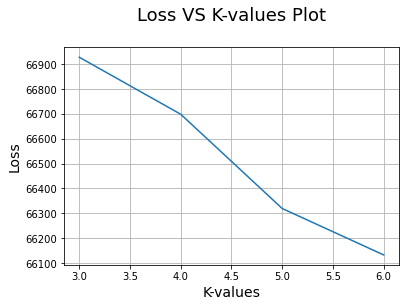

In [18]:
#Draw Loss VS K values plot
plt.plot(k_values, loss)
plt.xlabel('K-values',size=14)
plt.ylabel('Loss',size=14)
plt.title('Loss VS K-values Plot\n',size=18)
plt.grid(True)
plt.show()

In [26]:
# Choose the optimal value of k using silhouette score
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(3, 6):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(tf_idf)
    silhouette_scores.append(silhouette_score(tf_idf, kmeans.labels_))
print(silhouette_scores)    
    

[0.008085502899281826, 0.005878262814230784, 0.00918981352802015]


In [28]:
kmeans = KMeans(n_clusters=5).fit(tf_idf)

In [ ]:
reviews = df2['Review'].values

#Getting all the reviews in different clusters
cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []

for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster0.append(reviews[i])
    elif kmeans.labels_[i] == 1:
        cluster1.append(reviews[i])
    elif kmeans.labels_[i] == 2:
        cluster2.append(reviews[i])
    elif kmeans.labels_[i] == 3:
        cluster3.append(reviews[i])
    else :
        cluster4.append(reviews[i]) 
        
#Number of reviews in different clusters
print("No. of reviews in Cluster-0 : ",len(cluster0))
print("\nNo. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))
print("\nNo. of reviews in Cluster-3 : ",len(cluster3))
print("\nNo. of reviews in Cluster-4 : ",len(cluster4))

## Wordclouds of clusters obtained after applying k-means

Cluster 0:

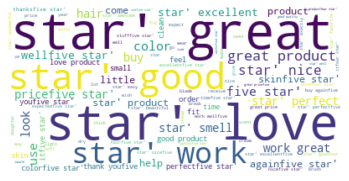

Cluster 1:

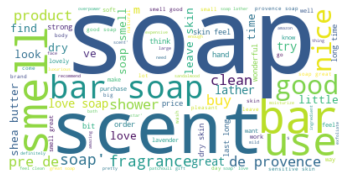

Cluster 2:

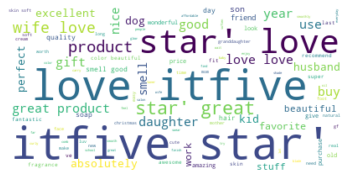

Cluster 3:

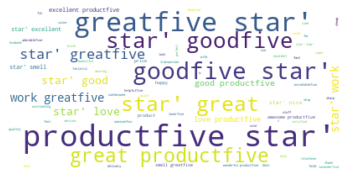

Cluster 4:

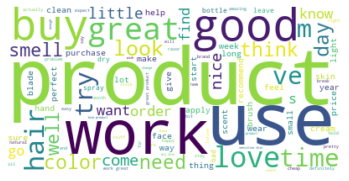

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

list= [cluster0, cluster1, cluster2, cluster3,cluster4]

count=1
for i in range(5):
    print("Cluster %d:" % i, end='')
    count +=1
    wc = WordCloud(background_color="white", max_words=100)
    wc.generate(str(list[i]))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# RFM analysis

## RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns.

1. Recency: How recently customers made their purchase.
2. Frequency: For simplicity, we’ll count the number of times each customer made a purchase.
3. Monetary: How much money they spent in total.






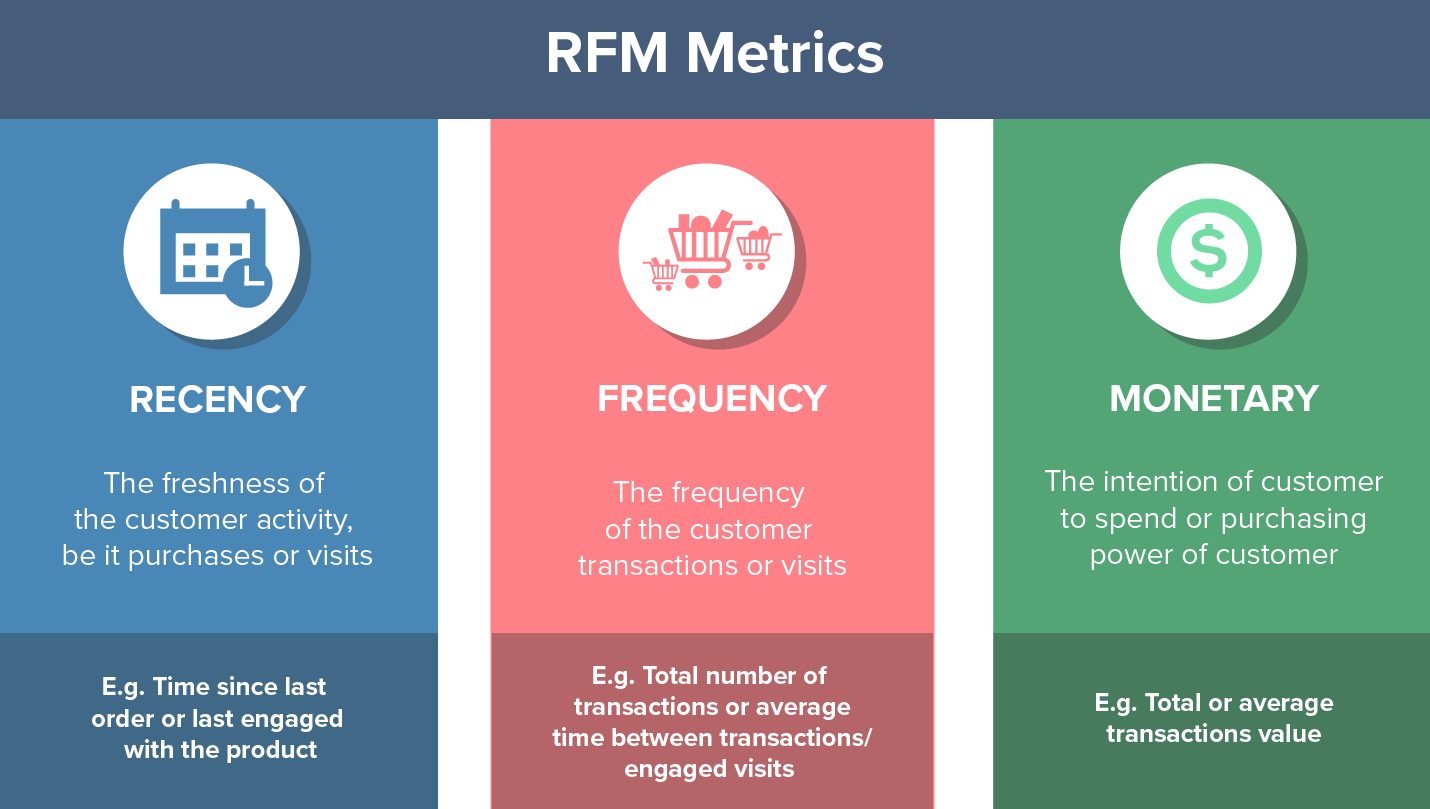







In [11]:
# Converting Date Format
beauty['reviewTime'] = pd.to_datetime(beauty['reviewTime'])

In [12]:
max_date = beauty['reviewTime'].max()
max_date

Timestamp('2018-09-30 00:00:00')

In [13]:
# Creating Date
end_date = dt.datetime(2018, 10, 1)

In [14]:
# Grouping the Data for RFM
data = beauty.groupby('reviewerID').agg({'reviewTime': lambda reviewTime: (end_date - reviewTime.max()).days,'asin' : 'nunique', 'price' : 'sum'})
     

In [15]:
# Shape of Data
data.shape
     

(65433, 3)

In [16]:
data.isnull().sum()

reviewTime    0
asin          0
price         0
dtype: int64

In [17]:

# Assigning Columns
data.columns = ['recency','frequency','monetary']
# Data Head
data.head()

,recency,frequency,monetary
reviewerID,,,
A0076691MGD6V7MG3T62,1579,1,29.79
A00827299BWJTEFNVKP0,317,1,24.95
A0096681Y127OL1H8W3U,1172,1,11.94
A0137540IHMZM8Q3V1QD,1455,2,2.98
A0148728MFRW1Y6J8UD4,76,1,6.47


In [18]:
data.describe()

,recency,frequency,monetary
count,65433.000000,65433.000000,65433.000000
mean,937.404719,1.046292,18.069497
std,611.910834,0.241963,23.303742
min,1.000000,1.000000,0.100000
25%,459.000000,1.000000,8.270000
50%,849.000000,1.000000,11.940000
75%,1310.000000,1.000000,19.950000
max,6383.000000,8.000000,1899.000000


In [19]:
# Scaling of Data
std = StandardScaler()
scaled_df = std.fit_transform(data)
# Creating DataFrame for Scaled Data
scaled_df = pd.DataFrame(scaled_df,columns=['recency','frequency','monetary'], index=data.index)
scaled_df.head()

,recency,frequency,monetary
reviewerID,,,
A0076691MGD6V7MG3T62,1.048519,-0.191319,0.502949
A00827299BWJTEFNVKP0,-1.013889,-0.191319,0.295255
A0096681Y127OL1H8W3U,0.383384,-0.191319,-0.263028
A0137540IHMZM8Q3V1QD,0.845874,3.941579,-0.647519
A0148728MFRW1Y6J8UD4,-1.407740,-0.191319,-0.497756


In [20]:
scaled_df.isnull().sum()

recency      0
frequency    0
monetary     0
dtype: int64

In [25]:

silhouette_scores = []
for k in range(4, 6):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
print(silhouette_scores)    
    

[0.48152923912680384, 0.482108260001747]


### k=4

In [44]:
# Model Building
model_1 = KMeans(n_clusters=4,random_state=42)

In [45]:
# Fitting Data
model_1.fit(scaled_df)
     

KMeans(n_clusters=4, random_state=42)

In [46]:
# Interpret the clusters
cluster_centers = pd.DataFrame(model_1.cluster_centers_)
print(cluster_centers)

          0         1         2             3
0 -0.633507 -0.191319 -0.152499  2.000000e+00
1  0.999985 -0.191319 -0.080626  1.000000e+00
2  0.237296 -0.114862  5.670418 -4.440892e-15
3  0.043900  4.479911  0.825565  3.000000e+00


In [47]:
# Cluster Labels
label_df = pd.DataFrame(model_1.labels_,columns=['labels'])
label_df.head()
     

,labels
0,1
1,0
2,1
3,3
4,0


In [48]:
# Adding Labels to Data Frame
scaled_df['labels'] = label_df['labels'].values
scaled_df.head()

,recency,frequency,monetary,labels
reviewerID,,,,
A0076691MGD6V7MG3T62,1.048519,-0.191319,0.502949,1
A00827299BWJTEFNVKP0,-1.013889,-0.191319,0.295255,0
A0096681Y127OL1H8W3U,0.383384,-0.191319,-0.263028,1
A0137540IHMZM8Q3V1QD,0.845874,3.941579,-0.647519,3
A0148728MFRW1Y6J8UD4,-1.407740,-0.191319,-0.497756,0


In [49]:
data['labels'] = label_df['labels'].values
data.head()

,recency,frequency,monetary,labels
reviewerID,,,,
A0076691MGD6V7MG3T62,1579,1,29.79,1
A00827299BWJTEFNVKP0,317,1,24.95,0
A0096681Y127OL1H8W3U,1172,1,11.94,1
A0137540IHMZM8Q3V1QD,1455,2,2.98,3
A0148728MFRW1Y6J8UD4,76,1,6.47,0


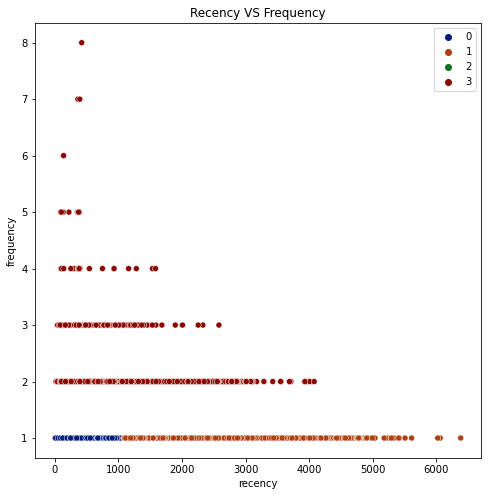

In [50]:
# Recency VS Frequency
plt.figure(figsize=(8,8))
sns.scatterplot(x ='recency',y = 'frequency',data = data, hue=model_1.labels_, palette='dark')
plt.title('Recency VS Frequency')
plt.show()

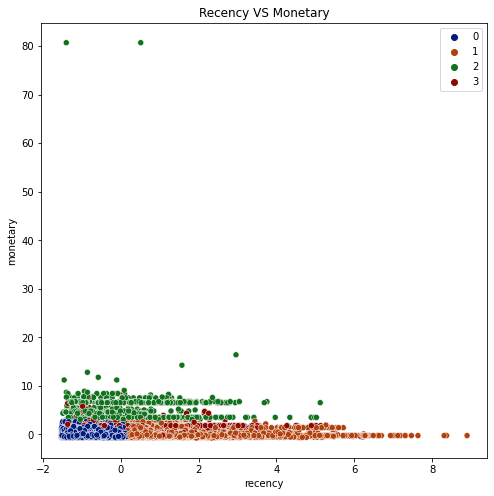

In [51]:

# Recency VS Monetary
plt.figure(figsize=(8,8))
sns.scatterplot(x ='recency',y = 'monetary',data = scaled_df, hue=model_1.labels_, palette='dark')
plt.title('Recency VS Monetary')
plt.show()

In [52]:
reviews = df2['Review'].values
cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
#cluster4 = []

for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster0.append(reviews[i])
    elif kmeans.labels_[i] == 1:
        cluster1.append(reviews[i])
    elif kmeans.labels_[i] == 2:
        cluster2.append(reviews[i])
    #elif kmeans.labels_[i] == 3:
        #cluster3.append(reviews[i])
    else :
        cluster3.append(reviews[i]) 
        
#Number of reviews in different clusters
print("No. of reviews in Cluster-0 : ",len(cluster0))
print("\nNo. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))
print("\nNo. of reviews in Cluster-3 : ",len(cluster3))
#print("\nNo. of reviews in Cluster-4 : ",len(cluster4))

No. of reviews in Cluster-0 :  38134

No. of reviews in Cluster-1 :  2664

No. of reviews in Cluster-2 :  23660

No. of reviews in Cluster-3 :  975


In [56]:
# Replacing Names of Clusters
#data['labels'] = data['labels'].replace({0:'Retention',1:'Reactivation',2:'upselling',3:'Retention'})
cluster_means = data.groupby('labels').mean()
#cluster_means['labels'] = cluster_means['labels'].replace({0:'Loyalty',1:'Reactivation',2:'upselling',3:'Loyalty'})
cluster_means = cluster_means.rename(index={0: 'Retention', 1: 'Reactivation', 2: 'upselling', 3: 'Loyalty'})
cluster_means

,recency,frequency,monetary
labels,,,
Retention,549.758142,1.000000,14.515733
Reactivation,1549.301899,1.000000,16.190619
upselling,1082.607400,1.018499,150.210452
Loyalty,964.267643,2.130255,37.308108


Based on the provided cluster means, there are a few ways to interpret the data to improve the business:

Retention: The first cluster (label 0) consists of customers who have made a recent purchase but have a low frequency and spend less money per transaction. To improve retention in this segment, the business could consider offering incentives or rewards to encourage repeat purchases, or sending personalized marketing messages to re-engage these customers.

Reactivation: The second cluster (label 1) consists of customers who made a single purchase a long time ago and have not returned since. To reactivate these customers, the business could consider sending personalized emails or offers to entice them to return, or conducting market research to understand why these customers haven't returned and address their concerns.

Upselling/Cross-selling: The third cluster (label 2) consists of customers who make purchases relatively frequently, with a high monetary value per transaction. To increase revenue from this segment, the business could consider offering complementary products or services to increase the average transaction value, or conducting targeted marketing campaigns to promote more expensive products.

Loyalty: The fourth cluster (label 3) consists of customers who make purchases more frequently than the first two clusters, but spend less money per transaction compared to the third cluster. To improve loyalty and retention in this segment, the business could consider offering loyalty programs or rewards to incentivize repeat purchases, or conducting market research to understand why these customers are spending less per transaction and address any concerns they may have.

# Conclusion

# The four customer segments identified are Retention, Reactivation, Upselling/Cross-selling, and Loyalty. To improve business, the company can offer incentives or rewards to encourage repeat purchases for Retention customers, send personalized emails or offers to entice Reactivation customers, offer complementary products or services for Upselling/Cross-selling customers, and offer loyalty programs or rewards for Loyalty customers.